In [2]:
## Basic imports 
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'gender_images/'

os.chdir(base_dir)
os.listdir()

path_training = 'Training/'
path_validation = 'Validation/'

pic_path = path_training+'female/131435.jpg.jpg'
image_size = (90, 90)
batch_size = 128

target_size = (224, 224)
input_shape=(224, 224, 3)
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8


train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')








validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.5)




train_generator = train_datagen.flow_from_directory(
    path_training,
    seed=10,
    target_size=(98,76),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True
)


validation_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset = 'training'
)

test_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset='validation'
)



from matplotlib.image import imread

takeapeak = imread(pic_path)
takeapeak.shape







Found 47035 images belonging to 2 classes.
Found 5822 images belonging to 2 classes.
Found 5821 images belonging to 2 classes.


(98, 76, 3)

In [ ]:

##print("Image size of train ",train_generator[0].shape)

In [4]:
from keras.optimizers.optimizer_v2.rmsprop import RMSProp
## Build the VGG model 

from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import RMSprop
##from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten, Dense
from keras.applications import VGG16


vgg=keras.applications.VGG16(include_top=False, pooling='avg', weights='imagenet',
input_shape=(98,76, 3))


# Freeze the layers except the last 5
for layer in vgg.layers[:-5]:
 layer.trainable = False# Check the trainable status of the individual layers
for layer in vgg.layers:
 print(layer, layer.trainable)

 # Create the model
model = Sequential()# Add the VGG16 convolutional base model
model.add(vgg)
 
# Add new layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='sigmoid'))

## Compile and Summary
##model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7ff46c259890> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46df27090> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46df27310> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff4dcdd1bd0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46c15b950> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46c163dd0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff46c163090> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46c0ec950> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46c0f7550> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46c0f77d0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff46c0f7a50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff46c101bd0> False
<keras.layers.convolutional.con

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [5]:



model_with_tuning = 'best_tune_model.h5'
checkpoint_callback = ModelCheckpoint(model_with_tuning,
                                     monitor='val_accuracy',
                                      verbose=2,
                                     save_best_only=True,mode='max')
"""
hist = model.fit(train_generator,
                   steps_per_epoch=len(train_generator) // 64,
                   epochs=3,
                   validation_data=validation_generator,
                   validation_steps=len(validation_generator)// 64,
                   verbose=1,
                   callbacks=[checkpoint_callback])
                   """

hist =  model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=20,
                           callbacks=checkpoint_callback)                  
for key in hist.history:
 print(key)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.5599 - accuracy: 0.7406  
Epoch 1: val_accuracy improved from -inf to 0.50275, saving model to best_tune_model.h5
5/5 [==============================] - 3304s 806s/step - loss: 0.5599 - accuracy: 0.7406 - val_loss: 0.7952 - val_accuracy: 0.5027
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.8188  
Epoch 2: val_accuracy improved from 0.50275 to 0.53384, saving model to best_tune_model.h5
5/5 [==============================] - 771s 173s/step - loss: 0.4128 - accuracy: 0.8188 - val_loss: 0.6770 - val_accuracy: 0.5338
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8453  
Epoch 3: val_accuracy improved from 0.53384 to 0.68945, saving model to best_tune_model.h5
5/5 [==============================] - 773s 174s/step - loss: 0.3569 - accuracy: 0.8453 - val_loss: 0.5247 - val_accuracy: 0.6895
Epoch 4/20
5/5 [==============================] - ETA: 0s

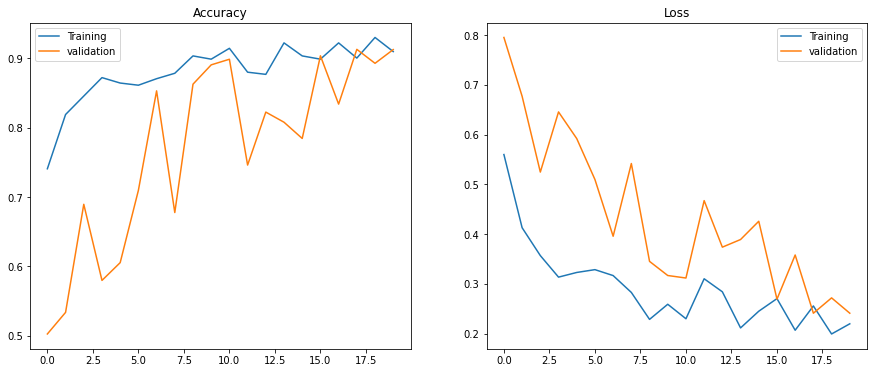

In [6]:
import matplotlib.pyplot as plt
## plot the chart 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

